# Neural Networks

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os

# Food recognition
import PIL
from os import listdir
from matplotlib import image
from matplotlib import pyplot
from PIL import Image
import pandas as pd


30612 training labels loaded
Start loading 200 images
Loading at 0.0%
Loading at 50.0%
Loading at 100.0%
Reached MAX_IMAGE count of 200
21
train_1.jpg


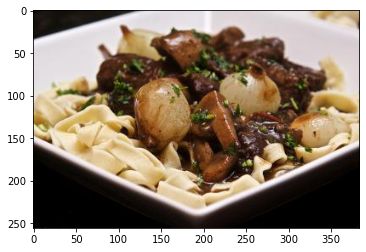

29
train_2.jpg


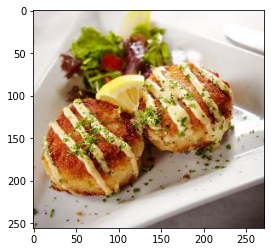

17
train_3.jpg


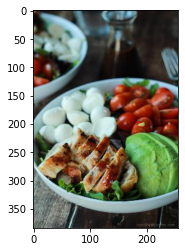

21
train_4.jpg


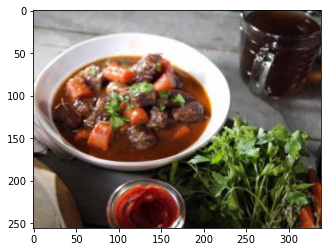

50
train_5.jpg


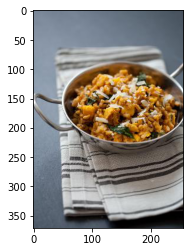

8
train_6.jpg


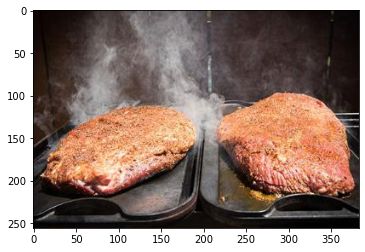

42
train_7.jpg


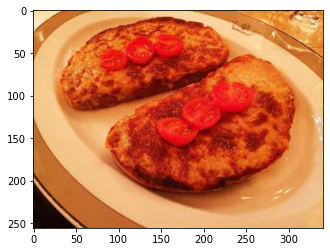

68
train_8.jpg


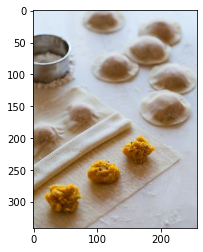

10
train_9.jpg


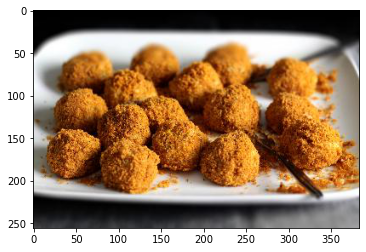

9
train_10.jpg


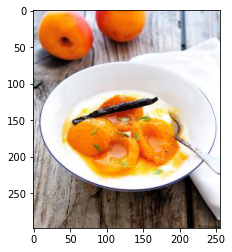

In [22]:
# Local data directories
DATA_DIR = '/Users/dj/Documents/GitHub/Data/food-recognition-challenge-2021'
TRAIN_DIR = DATA_DIR + '/train_set/train_set/'
TEST_DIR = DATA_DIR + '/test_set/test_set/'

# Maximum number of images to load (there are 30k)
MAX_IMAGE = 200

# Filter for a subset of labels in the images to load
FILTER_LABEL = []

# load all the training labels
train_labels = pd.read_csv(DATA_DIR + '/train_labels.csv', dtype={'label': object})
if (len(FILTER_LABEL) > 0):
    train_labels = train_labels[train_labels['label'].isin(FILTER_LABEL)].copy().reset_index()
print('{} training labels loaded'.format(len(train_labels)))  

# load all the training images
train_images = list()
imcount = 0
if MAX_IMAGE == 0:
    MAX_IMAGE = len(train_labels)

print('Start loading {} images'.format(MAX_IMAGE))
for filename in train_labels['img_name']:
    # Load image
    img = Image.open(TRAIN_DIR + filename)
    
    # Resize image to the same shape
    # TODO: Don't squash all images into the same size
    #img = img.resize((256,256), Image.ANTIALIAS)

    # Convert image to numpy array
    img_data = np.array(img)

    # Store loaded image
    train_images.append(img_data)

    # Show progress
    if imcount % 100 == 0:
        print('Loading at {:.1f}%'.format(imcount/min(len(train_labels), MAX_IMAGE)*100))

    # Stop after X images   
    imcount += 1
    if imcount > MAX_IMAGE:
        print('Reached MAX_IMAGE count of '+str(MAX_IMAGE))
        break

# Show 10 samples
for i in range(0,min(10, len(train_labels))):
    print(train_labels['label'][i])
    print(train_labels['img_name'][i])
    pyplot.imshow(train_images[i])
    pyplot.show()

# Model of Seth

Found 572 validated image filenames belonging to 2 classes.
Found 144 validated image filenames belonging to 2 classes.
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 30, 30, 128)       0         

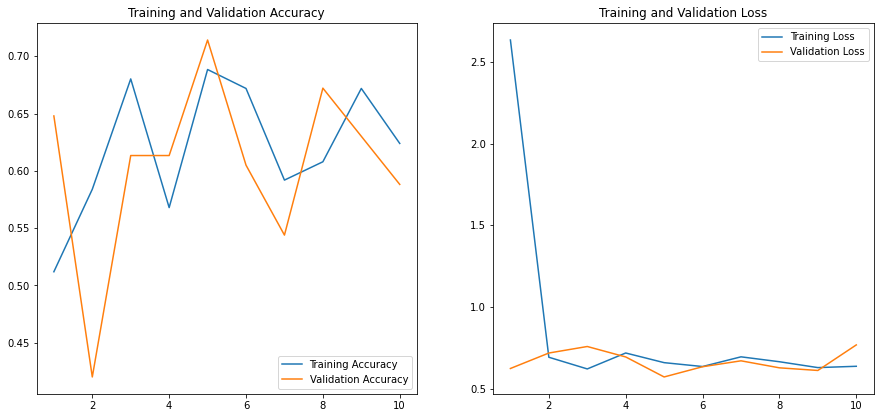

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

# Create a training and test set generator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_split = int(len(train_labels)*0.8)
train_dataframe = train_labels[:train_split][['img_name','label']]
val_dataframe = train_labels[train_split:][['img_name','label']]

train_generator = train_datagen.flow_from_dataframe(
    train_dataframe,
    x_col = 'img_name',
    y_col = 'label',
    directory=TRAIN_DIR,
    target_size=(256,256),
    batch_size=25,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_dataframe,
    x_col = 'img_name',
    y_col = 'label',
    directory=TRAIN_DIR,
    target_size=(256,256),
    batch_size=25,
    class_mode='categorical'
)

# Define the model
model = Sequential()
model.add(Conv2D(32, 3, activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, activation="relu"))
model.add(MaxPool2D())
#model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics = ['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=5, epochs = 10, validation_data = val_generator, validation_steps=5)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# EDA

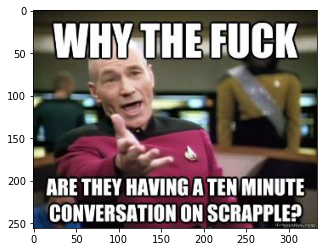

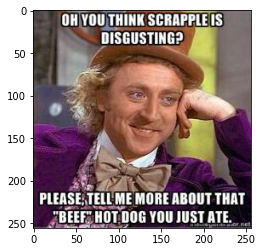

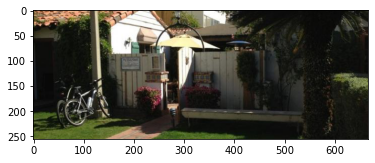

In [13]:
numbers = [6302, 5999, 5719]
for i in numbers:
    img = Image.open(TRAIN_DIR + 'train_' + str(i) + '.jpg')
    img_data = np.array(img)
    pyplot.imshow(img_data)
    pyplot.show()

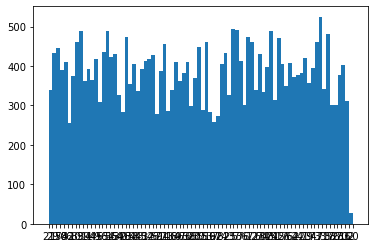

In [30]:
d = train_labels["label"]
plt.hist(d, bins = 80)
plt.show()

In [36]:
train_labels.label.value_counts()[ train_labels.label.value_counts() < 300]

66    299
55    289
13    286
19    284
40    284
59    278
78    274
67    257
42    255
20     27
Name: label, dtype: int64

In [49]:
bs = train_labels[train_labels["label"] == "67"] # 28, 67
bs

,img_name,label
56,train_57.jpg,67
136,train_137.jpg,67
738,train_739.jpg,67
904,train_905.jpg,67
929,train_930.jpg,67
...,...,...
29817,train_29818.jpg,67
29892,train_29893.jpg,67
29910,train_29911.jpg,67
30331,train_30332.jpg,67


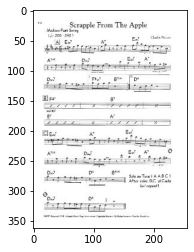

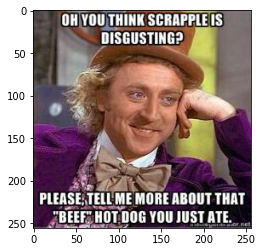

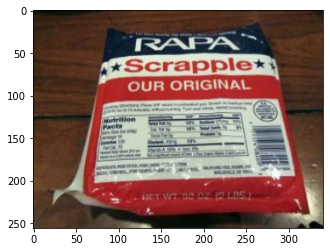

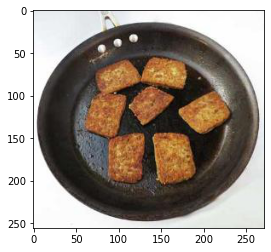

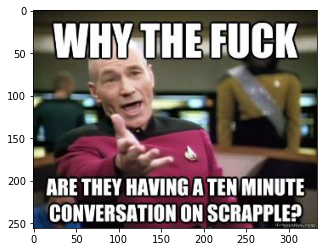

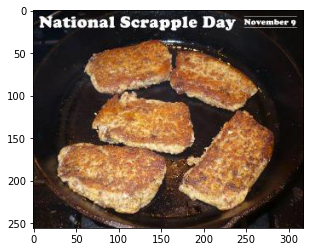

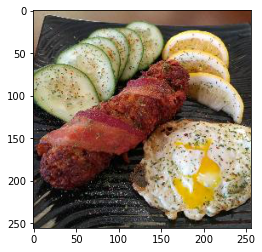

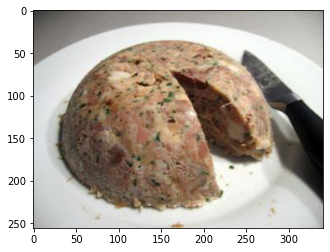

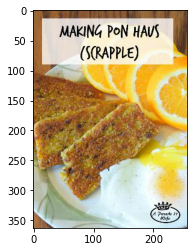

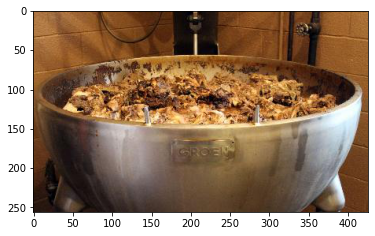

In [53]:
for i in np.arange(40,50):
    slic = bs.iloc[i,]
    img = Image.open(TRAIN_DIR + slic['img_name'])
    img_data = np.array(img)
    pyplot.imshow(img_data)
    pyplot.show()